In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

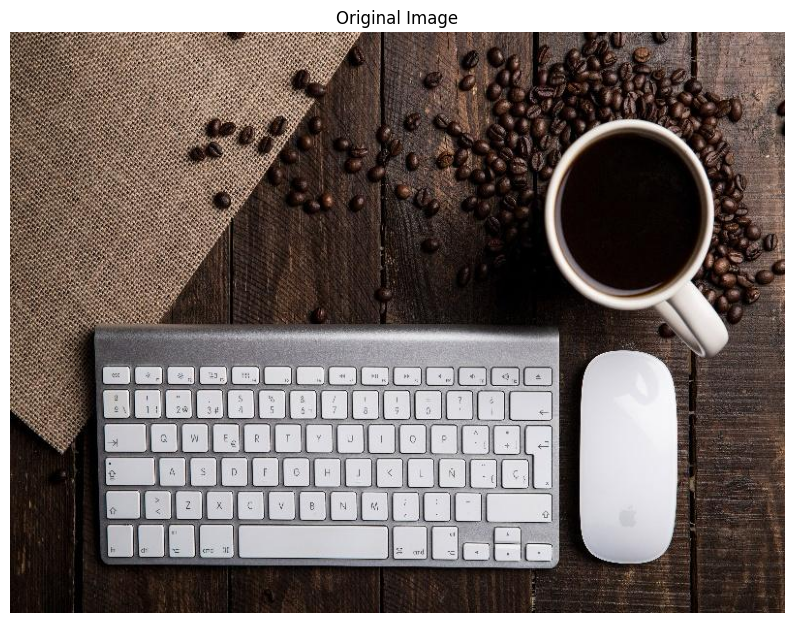

In [4]:
photo_data= plt.imread('/kaggle/input/coffee/coffee.jpg')
plt.figure(figsize=(10,10))
plt.set_cmap("gray")
plt.axis("off")
plt.title("Original Image")
plt.imshow(photo_data)

Text(0.5, 1.0, 'Gray Image')

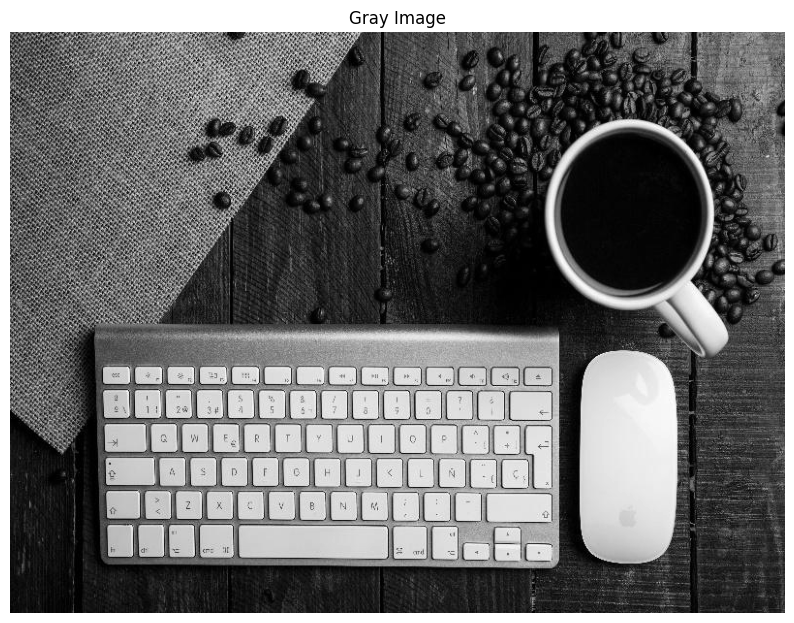

In [5]:
G= np.mean(photo_data, -1)
plt.figure(figsize=(10,10))
plt.imshow(G)
plt.set_cmap("gray")
plt.axis("off")
plt.title("Gray Image")

In [14]:
def SVD1(G, G_T):
    eigenvalues , eigenvectors= np.linalg.eig(G_T)

    sorted_indices= np.argsort(eigenvalues)[::-1]
    eigenvalues= eigenvalues[sorted_indices]
    eigenvectors= eigenvectors[:, sorted_indices]
    singular_values= eigenvalues**(1/2)
    inverse_singular_values= 1/singular_values

    S= np.diag(singular_values)
    U= eigenvectors
    V= G.T @ eigenvectors @ np.diag(inverse_singular_values)
    V_T= V.T
    return U, S, V_T

def SVD2(G, G_T):
    eigenvalues , eigenvectors= np.linalg.eig(G_T)

    sorted_indices= np.argsort(eigenvalues)[::-1]
    eigenvalues= eigenvalues[sorted_indices]
    eigenvectors= eigenvectors[:, sorted_indices]
    singular_values= eigenvalues**(1/2)
    inverse_singular_values= 1/singular_values

    S= np.diag(singular_values)
    V= eigenvectors
    U= G @ V @ np.diag(inverse_singular_values)
    V_T= V.T
    return U, S, V_T

In [15]:
G_T= G @ G.T
U1, S1, V_T1= SVD1(G, G_T)

G_T= G.T @ G
U2, S2, V_T2= SVD2(G, G_T)

In [16]:
ranks= np.arange(1,min(G.shape[0], G.shape[1])+1)
mse_values=[]


In [17]:
def mse_calc(original, compressed):
    mse= np.mean((original-compressed)**2)
    return mse

def PSNR_calc(mse_value):
    PSNR= 10*np.log10((255**2)/mse_value)
    return PSNR

Text(0.5, 1.0, 'MSE and PSNR CASE1')

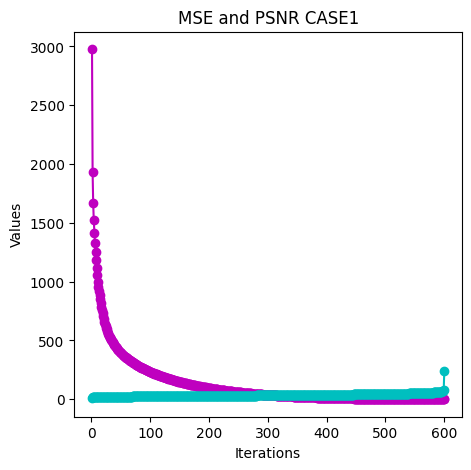

In [18]:
mse_values1=[]
x=[]
PSNR_values1=[]

#This is the first plots for G*G.T
for i in ranks:
    compressed_U= U1[:, :i]
    compressed_V_T= V_T1[:i, :]
    compressed_S= S1[:i, :i]
    
    compressed_img= compressed_U @ compressed_S @ compressed_V_T
    
    mse_value1= mse_calc(G, compressed_img)
    mse_values1.append(mse_value1)
    PSNR_values1.append(PSNR_calc(mse_value1))
    x.append(i)
    
plt.figure(figsize=(5,5))
plt.plot(x, mse_values1, 'mo-')
plt.plot(x, PSNR_values1, 'co-')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('MSE and PSNR CASE1')

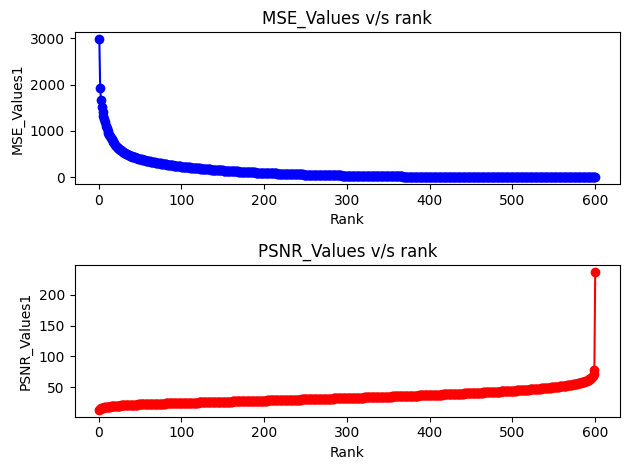

In [19]:
plt.subplot(2, 1, 1)
plt.plot(x, mse_values1, 'bo-')
plt.xlabel('Rank')
plt.ylabel('MSE_Values1')
plt.title('MSE_Values v/s rank')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(x, PSNR_values1, 'ro-')
plt.xlabel('Rank')
plt.ylabel('PSNR_Values1')
plt.title('PSNR_Values v/s rank')
plt.tight_layout()

Text(0.5, 1.0, 'MSE and PSNR CASE2')

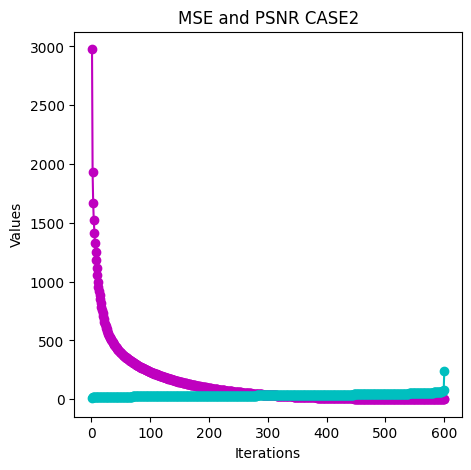

In [21]:
mse_values2=[]
PSNR_values2=[]

#This is the second plots for G.T*G
for i in ranks:
    compressed_U= U2[:, :i]
    compressed_V_T= V_T2[:i, :]
    compressed_S= S2[:i, :i]
    
    compressed_img= compressed_U @ compressed_S @ compressed_V_T
    
    mse_value2= mse_calc(G, compressed_img)
    mse_values2.append(mse_value2)
    PSNR_values2.append(PSNR_calc(mse_value2))
    
plt.figure(figsize=(5,5))
plt.plot(x, mse_values2, 'mo-')
plt.plot(x, PSNR_values2, 'co-')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.title('MSE and PSNR CASE2')

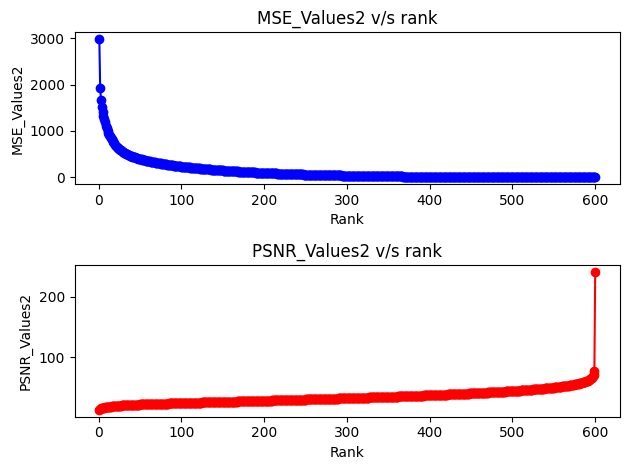

In [22]:
plt.subplot(2, 1, 1)
plt.plot(x, mse_values2, 'bo-')
plt.xlabel('Rank')
plt.ylabel('MSE_Values2')
plt.title('MSE_Values2 v/s rank')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(x, PSNR_values2, 'ro-')
plt.xlabel('Rank')
plt.ylabel('PSNR_Values2')
plt.title('PSNR_Values2 v/s rank')
plt.tight_layout()